<a href="https://colab.research.google.com/github/Albly/ML_for_Wireless_communication/blob/main/IQ_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

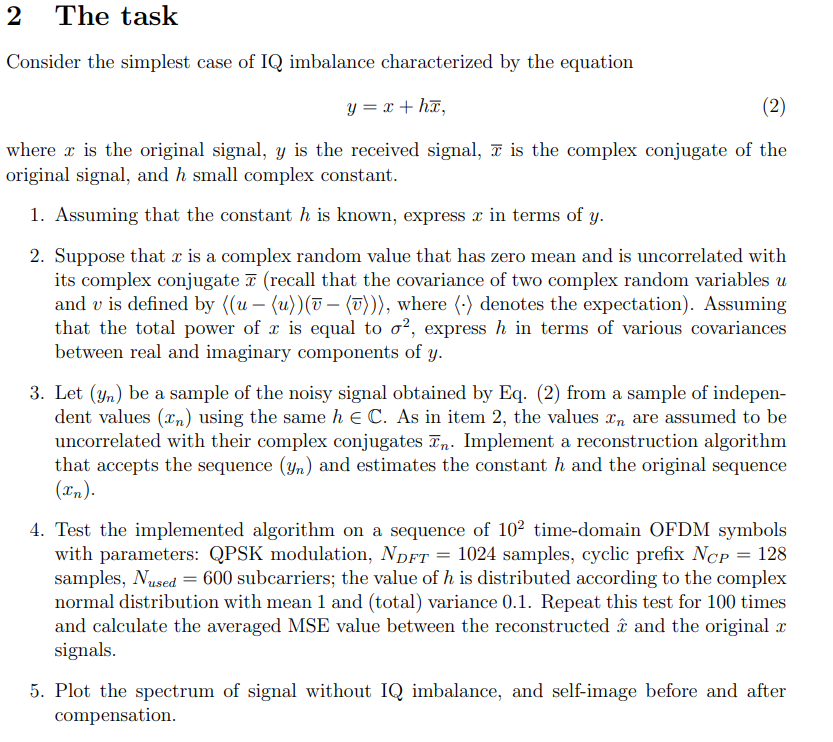

# **Subtask 1**

Assume that italic letters ($x$) - scalars and non italic ($\text{x}$) - vectors. Also complex vectors can be assigned with dot ($\dot{\text{x}}$)
Complex vector $\dot{\text{x}}$ can be represented as follows: 
$$
\dot{\text{x}} = 
\begin{bmatrix}
x^1_{re} \\
\vdots  \\
x^n_{re} 
\end{bmatrix}
+ i
\begin{bmatrix}
x^1_{im} \\
\vdots  \\
x^n_{im}
\end{bmatrix}
= 
\text{x}_{re} + i\text{x}_{im} 
$$


According to the task, signal after IQ distortion can be represented as follows:
$$
\dot{\text{y}} = \dot{\text{x}} + h\dot{\text{x}}^*
$$
where $\dot{\text{x}}$ and $\dot{\text{y}}$ are complex vectors and $\dot{\text{x}}^*$ - is conjucated vector $\dot{\text{x}}$

Then this equation can be reformulated as follows:
$$
\text{y}_{re}+ i\text{y}_{im} = \text{x}_{re} + i\text{x}_{im} + (h_{re}+ih_{im})(\text{x}_{re} - i\text{x}_{im}) 
$$

To express $\dot{\text{x}}$ in terms of $\dot{\text{y}}$ we have to do it for real and imaginary part:

$$
\text{y}_{re}+ i\text{y}_{im} = \text{x}_{re} + i\text{x}_{im} + (h_{re}+ih_{im})(\text{x}_{re} - i\text{x}_{im}) 
$$
Let us separate real and imaginary part of this combination:
$$
\dot{\text{y}} = \text{x}_{re} + h_{re}\text{x}_{re}+h_{im}\text{x}_{im}+ i \left( \text{x}_{im}- h_{re}\text{x}_{im}+h_{im}\text{x}_{re} \right)
$$
And simplify this equation 
$$
\dot{\text{y}} = \text{x}_{re}(1+h_{re})+h_{im}\text{x}_{im} + i\Big(\text{x}_{im}(1-h_{re})+ h_{im}\text{x}_{re}\Big)
$$
Now we can equare real and imaginary parts from left and right sides to get system of 2 equations:
$$
\begin{cases}
\text{y}_{re} = \text{x}_{re}(1+h_{re})+h_{im}\text{x}_{im} \\
\text{y}_{im} = \text{x}_{im}(1-h_{re})+h_{im}\text{x}_{re} \\
\end{cases}
$$
Let us write this system into matrix form and solve it using  Cramer's rule:

$$
\left( \mkern1mu \begin{array}{@{}cc|c@{}}
1+h_{re} & h_{im} & \text{y}_{re} \\
h_{im} & 1-h_{re} & \text{y}_{im} \\
\end{array} \mkern1mu \right)
$$
Now find the determinants for Cramer's rule:
$$
\Delta = 
\begin{vmatrix}
1+h_{re} & h_{im} \\
h_{im} & 1-h_{re} \\
\end{vmatrix}
\qquad
\Delta_1 = 
\begin{vmatrix}
\text{y}_{re} & h_{im} \\
\text{y}_{im} & 1-h_{re} \\
\end{vmatrix}
\qquad
\Delta_2 = 
\begin{vmatrix}
1+h_{re} & \text{y}_{re} \\
h_{im} & \text{y}_{im} \\
\end{vmatrix}
$$
Then $\text{x}_{re}$ and $\text{x}_{im}$ can be found this way:



$$
\text{x}_{re} = \frac{\Delta_1}{\Delta} = \frac{\text{y}_{re}(1-h_{re})- \text{y}_{im}h_{im}}{1-h_{re}^2-h_{im}^2} 
$$
And
$$
\text{x}_{im} = \frac{\Delta_2}{\Delta} = \frac{\text{y}_{im}(1+h_{re})- \text{y}_{re}h_{im}}{1-h_{re}^2-h_{im}^2}
$$
Let us check the solution

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Create random $\dot{\text{x}}$ vector and random $\dot{h}$

In [ ]:
x_re, x_im = np.round(np.random.rand(1,3),2), np.round(np.random.rand(1,3),2) 
h_re, h_im = np.random.randint(2,9,1), np.random.randint(2,9,1)

Calculate $\dot{\text{y}}$ using the main formula: 

In [ ]:
y = x_re+1j*x_im + (h_re+1j*h_im)*(x_re-1j*x_im)
y_re, y_im = y.real, y.imag

Calculate x_re using obtained formula:

In [ ]:
print("Real x_re : ", x_re[0])
print("Calculated: ",((y_re*(1-h_re)-y_im*h_im)/(1-h_re**2-h_im**2))[0])
print("All the elements are equal: ",np.all(np.isclose(x_re, (y_re*(1-h_re)-y_im*h_im)/(1-h_re**2-h_im**2)) == True))

Real x_re :  [0.5  0.78 0.48]
Calculated:  [0.5  0.78 0.48]
All the elements are equal:  True


The same thing with x_im:


In [ ]:
print("Real x_im : ", x_im[0])
print("Calculated: ",((y_im*(1+h_re)-y_re*h_im)/(1-h_re**2-h_im**2))[0])
print("All the elements are equal: ",np.all(np.isclose(x_im, (y_im*(1+h_re)-y_re*h_im)/(1-h_re**2-h_im**2)) == True))

Real x_im :  [0.58 0.39 0.06]
Calculated:  [0.58 0.39 0.06]
All the elements are equal:  True


However the same solution, but in more elegant way can be obtained with following:

As $\dot{\text{y}} = \dot{\text{x}} + h\dot{\text{x}}^*$, then we can conjucate both parts of equation and find $\dot{\text{x}}^*$ :

$$
\dot{\text{y}}^* = \dot{\text{x}}^* + h^*\dot{\text{x}} \qquad (1)\\
\dot{\text{x}}^* = \dot{\text{y}}^* - h^*\dot{\text{x}} \qquad (2)
$$
Let us substitute (2) expression into (1):
$$
\dot{\text{y}} = \dot{\text{x}} + h(\dot{\text{y}}^* - h^*\dot{\text{x})}
$$
Now it's easy to find $\dot{\text{x}}$:
$$
\dot{\text{x}} = \frac{\dot{\text{y}}- h\dot{\text{y}}^*}{1- |h|^2}
$$
If we find real and imaginary parts from here, we well get the same result, as from 1st approach 



# **Subtask 2**

Covariance of two random complex values $A$ and $B$ can be calculated as follows:
$$
\text{cov}(\dot A,\dot B) = \text{E}\Big[\big(\dot A-\text{E}[\dot A]\big)\big(\dot B^* - \text{E}[\dot B^*]\big) \Big ] \qquad (3)
$$
Since 
$\dot{\text{x}}$
is uncorrelated with $\dot{\text{x}}^*$ then 
$$
\text{cov}(\dot{\text{x}},\dot{\text{x}}^*) = 0 
$$
Also, as $\dot{\text{x}}$ has zero mean then: 
$$
\text{E}(\dot{\text{x}}) = 0
$$
Using this fact and (3) equation we can easily find that:
$$
\text{cov}(\dot{\text{x}},\dot{\text{x}}^*) = \text{E}(\dot{\text{x}}  \dot{\text{x}} )
$$
Now we know that 
$\dot{\text{x}} = \dot{\text{y}} - h\dot{\text{x}}^*$, therefore:

$$
\text{cov}(\dot{\text{x}},\dot{\text{x}}^*) = 
\text{E}[(\dot{\text{y}} - h\dot{\text{x}}^*)(\dot{\text{y}} - h\dot{\text{x}}^*)] = \text{E}[\dot{\text{y}}^2-2\dot{\text{y}}h\dot{\text{x}}^*+h^2\dot{\text{x}}^{*2}]
$$

Again we can use the fact that 
$\dot{\text{x}}^* = \dot{\text{y}}^* - h^*\dot{\text{x}}$. And after simplification we will get: 

$$
\text{cov}(\dot{\text{x}},\dot{\text{x}}^*) = \text{E}\Big[\dot{\text{y}}^2-2|\dot{\text{y}}|^2h+2\dot{\text{y}}|h|^2\dot{\text{x}}+ h^2\dot{\text{y}}^{*2}-2\dot{\text{y}}^*|h|^2h\dot{\text{x}}+|h|^4\dot{\text{x}}^2 \Big]
$$

Now we can use the fact that $h$ is small (~0.1), therefore values multiplied to $h$ will be also small and we can omit some of them for simplicity. Let's omit all values where $h$ has power greater then 1: 

$$
\text{cov}(\dot{\text{x}},\dot{\text{x}}^*) = \text{E}[\dot{\text{y}}^2-2|\dot{\text{y}}|^2h] = 0
$$

Now we can replace expectation operation into summation as follows:

$$
\sum_{n=1}^{N}{\left(\dot{\text{y}_n}^2-2|\dot{\text{y}_n}|^2h\right)}
$$

And finaly after the simplification we will achieve the result: 
$$
h = \frac{\sum_{n=1}^{N}\dot{\text{y}}_n^2}{2\sum_{n=1}^{N}|\dot{\text{y}}_n|^2}
$$

# **Subtask 3**

Now we are going to implement proposed IQ distortion and reconstruction method

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def IQ_distort(x,h):
    '''
    Applies IQ distortion for signal 
    @x - signal for distortion
    @h - distortion coefficient
    '''
    return x + h*x.conj()

def generate_scene(P, vector_size =10**5):
    '''
    Function for tests. 
    Generates random signal @x with size @vector_size
    Generates random (with normal distrib) @h distortion coefficient
    Applies IQ distortion to signal @x
    
    inputs:
    @P - Power of signal, that is needs to be generated
    @vector_size - number of samples that @x will contain

    returns:
    @x - generated random signal
    @y - distorted signal
    @h - generated distortion coefficient 
    '''
    mu = 0
    sigma = np.sqrt(P/2)
    x = np.random.normal(mu,sigma, (vector_size,)) + 1j*np.random.normal(mu,sigma, (vector_size,))
    h = np.random.normal(mu,sigma,1) + 1j*np.random.normal(mu,sigma,1)
    y = IQ_distort(x,h)
    
    return x,y, h


def generate_scene_(P, h_var=0.1,  vector_size =10**5):
    '''
    Function for tests. 
    Does the same as @generate_scene(), 
    but @h is choosen with task condition
    '''

    mu = 0
    sigma = np.sqrt(P/2)
    x = np.random.normal(mu,sigma, (vector_size,)) + 1j*np.random.normal(mu,sigma, (vector_size,))
    h = np.random.normal(1,0.1,1) + 1j*np.random.normal(1,0.1,1)
    y = IQ_distort(x,h)
    
    return x,y, h

def generate_scene_norm(P, norma, vector_size= 10**5):
    '''
    Function for tests. 
    Does the same as @generate_scene(),
    but @h is choosen with requred parameter @norma
    @norma - norm of value @h

    '''
    mu = 0
    sigma = np.sqrt(P/2)
    x = np.random.normal(mu,sigma, (vector_size,)) + 1j*np.random.normal(mu,sigma, (vector_size,))
    # generate real part
    h_Re = np.random.normal(mu,norma/4,1)
    # find imaginary part from condition
    h_Im = (norma**2 - h_Re**2)**0.5
    h = h_Re + 1j*h_Im 
    y = IQ_distort(x,h)

    return x,y, h


def plot_Re(x,y):
    '''
    Plots Real part of signals @x and @y
    @x - real signal
    @y - distorted signal
    '''

    plt.figure(figsize=(20,5))
    plt.title("Real signal part",fontsize = 16)
    plt.xlabel("Time samples",fontsize = 14)
    plt.ylabel("Amplitude",fontsize = 14)
    plt.step(np.arange(len(x)),x.real, color = 'tab:green', label = 'Real')
    plt.step(np.arange(len(y)),y.real, color = 'tab:red', label = 'Distorted')
    plt.grid()
    plt.legend()
    plt.show()

def plot_Im(x,y):
    '''
    Plots Imaginary part of signals @x and @y
    @x - real signal
    @y - distorted signal
    '''
    plt.figure(figsize=(20,5))
    plt.title("Imaginary signal part",fontsize = 16)
    plt.xlabel("Time samples",fontsize = 14)
    plt.ylabel("Amplitude",fontsize = 14)
    plt.step(np.arange(len(x)),x.imag,color = 'tab:green', label = 'Real')
    plt.step(np.arange(len(y)),y.imag,color = 'tab:red', label = 'Distorted')
    plt.grid()
    plt.legend()
    plt.show()

def plot_complex(x,y):
    '''
    Plots Real and Imaginary parts of signals @x and @y
    @x - real signal
    @y - distorted signal
    '''
    plot_Re(x,y)
    plot_Im(x,y)


def h_estimate(y):
    '''
    h - estimation, using method, described in Subtask 2
    @y - distorted signal
    returns estimated h value
    '''
    return np.sum(y**2)/(2*np.sum(y*y.conj())) 

def x_estimate(y, h_est):
    '''
    X-estimation, using method from Subtask 1. 
    @y- distorted signal
    @h_est - estimated value h
    returns: estimated x vector
    '''
    return (y-h_est*y.conj())/(1-h_est*h_est.conj())


def mse(x,y, nmse = False):
    '''
    Calculates MSE for two complex vectors
    if @nmse == True: returns NMSE 
    @x and @y - input vectors
    '''
    if nmse:
        error = np.sum((np.abs(x-y))**2) / np.sum(abs(x)**2) 
    else:
        error = np.mean(np.abs(x-y)**2)
        
    return error

Now, let us check implemented solution. To do it we generate different h values, which norm is in interval (0.1, 2). Repeat experiment 50 times for each $|h|$

In [ ]:
from tqdm.auto import tqdm

h_mse_mean = []
h_mse_std = []
x_mse_mean = []
x_mse_std = []

#norm range
for norma in tqdm(linspace(0.1, 2, 100)):
    loc_h_mse = []
    loc_x_mse = []

    #repeat range
    for repeat in range(50):
        x,y,h = generate_scene_norm(1,norma, 10**5)
        if np.isnan(h): continue
        h_est = h_estimate(y)

        loc_h_mse.append(mse(h,h_est))
        x_est = (y-h_est*y.conj())/(1-h*h.conj())
        loc_x_mse.append(mse(x,x_est))
    
    #find mean and std of results
    h_mse_arr = np.array(loc_h_mse)
    h_mse_mean.append(np.mean(h_mse_arr))
    h_mse_std.append(np.var(h_mse_arr))

    x_mse_arr = np.array(loc_x_mse)
    x_mse_mean.append(np.mean(x_mse_arr))
    x_mse_std.append(np.var(x_mse_arr))


We can plot the results. 

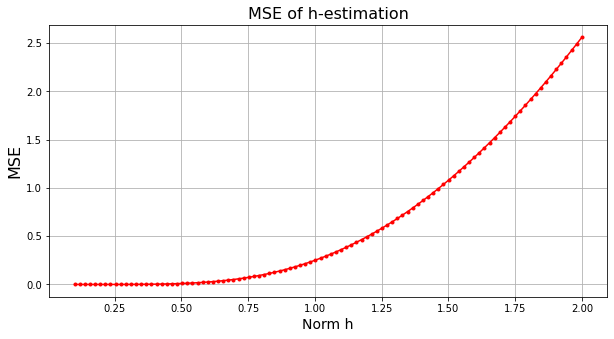

In [ ]:
plt.figure(figsize= (10,5))
plt.title('MSE of h-estimation', fontsize = 16)
plt.xlabel('Norm h',fontsize = 14)
plt.ylabel('MSE',fontsize = 16)
plt.plot(linspace(0.1, 2, 100), h_mse_mean, '.-', color = 'red')
plt.grid()

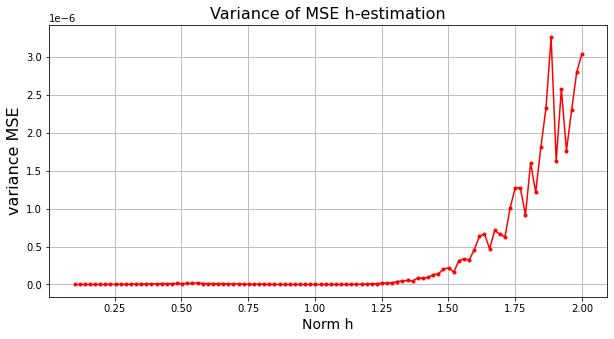

In [ ]:
plt.figure(figsize= (10,5))
plt.title('Variance of MSE h-estimation', fontsize = 16)
plt.xlabel('Norm h',fontsize = 14)
plt.ylabel('variance MSE',fontsize = 16)
plt.plot(linspace(0.1, 2, 100), h_mse_std, '.-', color = 'red')
plt.grid()

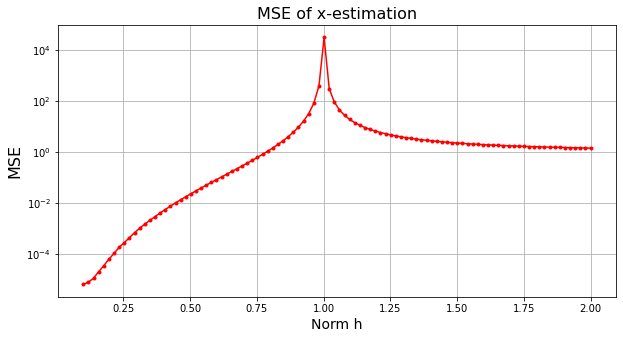

In [ ]:
plt.figure(figsize= (10,5))
plt.title('MSE of x-estimation', fontsize = 16)
plt.xlabel('Norm h',fontsize = 14)
plt.ylabel('MSE',fontsize = 16)
plt.plot(linspace(0.1, 2, 100), x_mse_mean, '.-', color = 'red')
plt.yscale('log')
plt.grid()

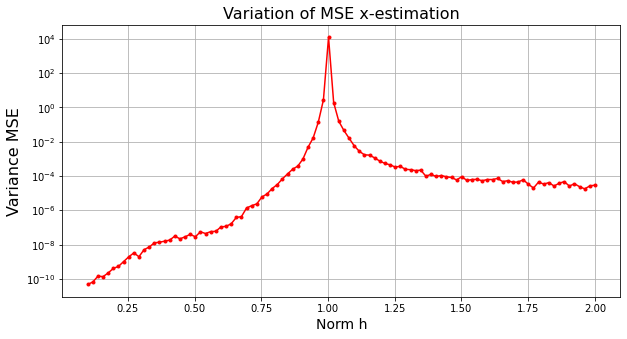

In [ ]:
plt.figure(figsize= (10,5))
plt.title('Variation of MSE x-estimation', fontsize = 16)
plt.xlabel('Norm h',fontsize = 14)
plt.ylabel('Variance MSE',fontsize = 16)
plt.plot(linspace(0.1, 2, 100), x_mse_std, '.-', color = 'red')
plt.yscale('log')
plt.grid()

We can see that implemented method is good enough for low $|h|$ values. The more $|h|$ is, the more error is. Obviously, the reason for this effect is omitting the terms where $|h|$ was in power higher than 1. We did it with the assumption that h-norm is very small. However, omitted terms cause the increase of the error for high $|h|$ values. 




---



Also, from machine learning applications well-known solution for signal estimation from mixed signals is Independent component analysis. This method works with two conditions:

1) The source signals are independent of each other. In our case, we assumed that $x$ and $x^*$ are independent, so this condition is fulfilled.

2) The values in each source signal have non-Gaussian distributions. 
Actually we generate vector x using gausiian distribution, therefore we have to change it. I implemented uniform distributed data. 

In [ ]:
# generate data
x,y,h = generate_scene_(1, 10**5)
# concatenate real and imaginary part
Y = np.c_[y.real,y.imag]
np.linalg.norm(h)

1.4587118615671801

In [ ]:
from sklearn.decomposition import FastICA
# apply ICA with 2 components
ica = FastICA(n_components=2)
# estimated real and imaginary parts
x_est = ica.fit_transform(Y)

mse(x,y)

2.129114128643708

However it turned out that method lose the information about amplitude. We can restore it because we know the power of the signal:


In [ ]:
X_est = x_est / np.sqrt(2*mean(abs(x_est)**2))

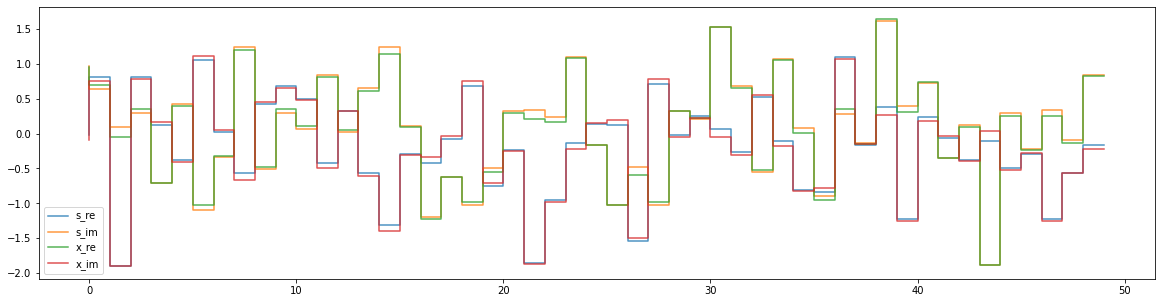

In [ ]:
plt.figure(figsize=(20,5))
plt.step(np.arange(50), -X_est[50:100,0],alpha = 0.8, label = 's_re')
plt.step(np.arange(50), X_est[50:100,1],alpha = 0.8, label = 's_im')

plt.step(np.arange(50), x[50:100].real,alpha = 0.8, label = 'x_re')
plt.step(np.arange(50), x[50:100].imag,alpha = 0.8, label = 'x_im')
plt.legend()

The method restores both components excellent. However, it turned out that ICA also loses information about the sign of the signal. I didn't face such a problem before because I used this method for images, where we have no negative values. But here, we need information about the sign, and I tried to restore it from the separation matrix, but nothing worked. So the components can be inverted for this method, and at the moment, I decided to use the previous method because the usually $|h|$ value is not so high.

# **Subtask 4**

Now lets implement OFDM signal with QPSK modulation.


In [ ]:
# number of subcariers
n_subc = 600
# length of cyclic prefix
c_prefix = 128
# number of pilots
pilots = 76 
# pilot signal that is known for both sides
pilot_value = -1-1j

# create array of subcariers
carriers = np.arange(n_subc)
# select subcariers for pilots
pilot_carriers = carriers[::n_subc//pilots]
# last subc will be the pilot (to avoid extrapolation during channel estimation for simplisity)
pilot_carriers = np.hstack([pilot_carriers, np.array([carriers[-1]])])
# Other subcariers will be for data
data_carreiers = np.delete(carriers, pilot_carriers)


print("N_subcariers: ", len(carriers))
print("N_pilots    : ",  len(pilot_carriers))
print("N_data subc : ",  len(data_carreiers))

N_subcariers:  600
N_pilots    :  76
N_data subc :  524


Lets look how resource elements distributed between data and pilots

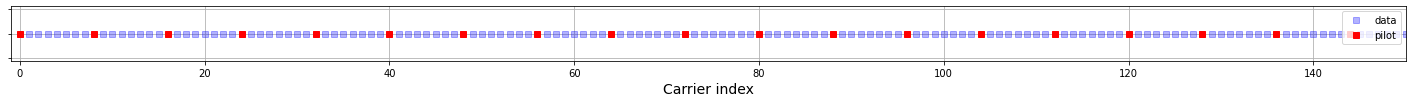

In [ ]:
def plot_subc(data_subc, pilot_subc, limit = True):
    plt.figure(figsize = (25,1))
    plt.plot(data_subc, np.zeros_like(data_subc), 's',color = 'blue', label='data', alpha = 0.3, )
    plt.plot(pilot_subc, np.zeros_like(pilot_subc), 's',color = 'red', label='pilot')
    plt.xlabel('Carrier index', fontsize = 14)
    fr = plt.gca()
    fr.axes.yaxis.set_ticklabels([])
    plt.grid()
    plt.legend()
    if limit:
        plt.xlim(-1,150)
    plt.show()
    
plot_subc(data_carreiers, pilot_carriers)

Implement mapping table using Gray's codes:

In [ ]:
# For QPSK we need 2 bits for symbol
bits_per_symbol = 2
# All amount of bits
payloadBits_per_OFDM  = len(data_carreiers)*bits_per_symbol
 
# mapping table with Gray's codes
mapping_table = {
    (0,0) : 1+1j,
    (0,1) : -1+1j,
    (1,1) : -1-1j,
    (1,0) : 1-1j
}

# generade also demaping table
demapping_table = {v : k for k, v in mapping_table.items()}

Let us look how contellation looks like:

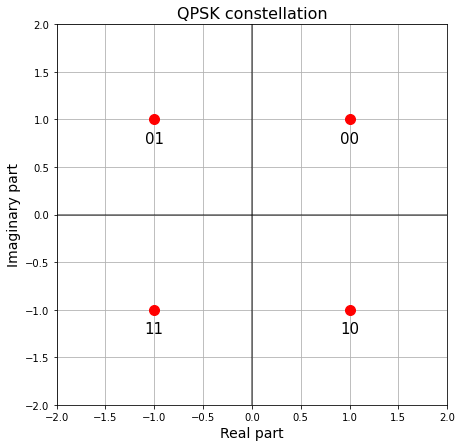

In [ ]:
plt.figure(figsize=(7,7))
for bit1 in [0,1]:
    for bit2 in [0,1]:
        bits = (bit1,bit2)
        value = mapping_table[bits]
        plt.plot(value.real, value.imag, 'o', color = 'red', markersize = 10 )
        plt.text(value.real, value.imag-0.25, ''.join(str(x) for x in bits), ha = 'center' ,fontsize= 15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('QPSK constellation', fontsize = 16)
plt.xlabel('Real part',fontsize =14)
plt.ylabel('Imaginary part', fontsize =14)
plt.vlines(0,-2,2,alpha = 0.6)
plt.hlines(0,-2,2, alpha =0.6)
plt.grid()

Now, we can create random bitstream

In [ ]:
# generate random bits with binomial distribution
data = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
# plot first 20 bits
print(data[:20])

[1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1]


Then we want to reshape bitstream to sequences of 2 bits:

In [ ]:
def serial_to_parallel(bits):
    return bits.reshape((len(data_carreiers), bits_per_symbol))

parallel_bits = serial_to_parallel(data)

#print first 5 sequences
print(parallel_bits[:5,:])

[[1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]]


And modulate these sequences using mapping table:

In [ ]:
def modulate(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
modulated  = modulate(parallel_bits)

# print 5 modulated sequences
print(modulated[:5])

[ 1.-1.j  1.-1.j  1.+1.j -1.+1.j -1.-1.j]


Now we have to allocate data symbols to their subcariers and we also have to do the same with pilot symbols:

In [ ]:
def allocate(data):
    # zero array
    symbol = np.zeros(n_subc, dtype=complex)
    # allocate pilot values
    symbol[pilot_carriers] = pilot_value
    # allocate data values
    symbol[data_carreiers] = data
    return symbol
    
OFDM_data = allocate(modulated)

Let us apply IDFT transformation to achieve data in time domain:

In [ ]:
def IDFT(data):
    # do IDFT. n - size of DFT
    return np.fft.ifft(data, n =1024)
OFDM_time = IDFT(OFDM_data)

In [ ]:
# Lets check, we should have 1024 samples
len(OFDM_time)

1024

Also we have to add cyclic prefix at the begining of resource block:

In [ ]:
def add_cyclic_prefix(data):
    # data for cyclic prefix
    cp = data[-c_prefix:]
    # cancatenate CP and data
    return np.hstack([cp,data])
    
OFDM_CP = add_cyclic_prefix(OFDM_time)

In [ ]:
# length of the sequence is changed
len(OFDM_CP)

1152

Lets plot the signal, that was generated:


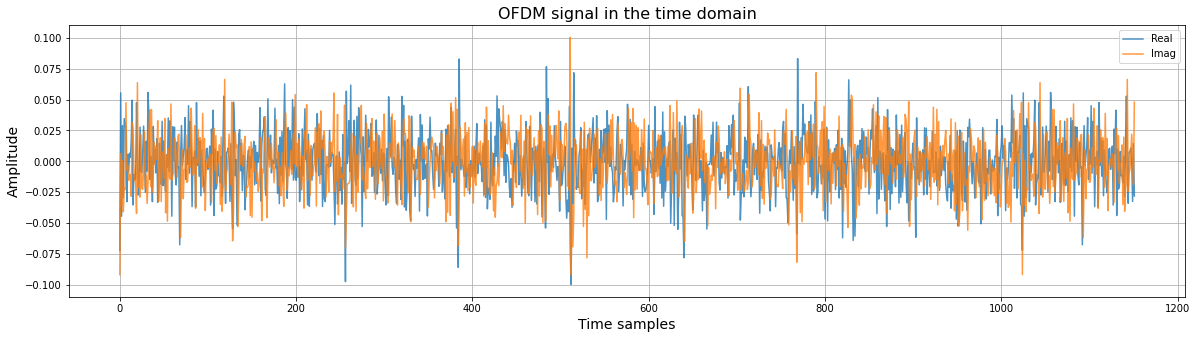

In [ ]:
plt.figure(figsize= (20,5))
plt.title('OFDM signal in the time domain', fontsize =16)
plt.plot(OFDM_CP.real, label = 'Real', alpha = 0.8)
plt.plot(OFDM_CP.imag, label ='Imag', alpha =0.8)
plt.xlabel('Time samples', fontsize =14)
plt.ylabel('Amplitude', fontsize =14)
plt.legend()
plt.grid()

From this moment, we want to achieve the initial bitstream. For simplicity, we assume that we have no distortion from the channel side, and the transmitted signal goes directly to the receiver. 

At first let's remove cyclic_prefix:

In [ ]:
def remove_cyclic_prefix(signal):
    return signal[c_prefix:]
OFDM_RX = remove_cyclic_prefix(OFDM_CP)

Then we want to get the signal in frequency domain:

In [ ]:
def DFT(signal):
    return np.fft.fft(signal, n=1024)
OFDM_freq = DFT(OFDM_RX)

Now we have to estimate our channel. To do it, we use pilot signals. We assume that between two neighbor pilots, our channel doesn't change significantly and we can use interpolate the state of the channel for all subcarriers. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


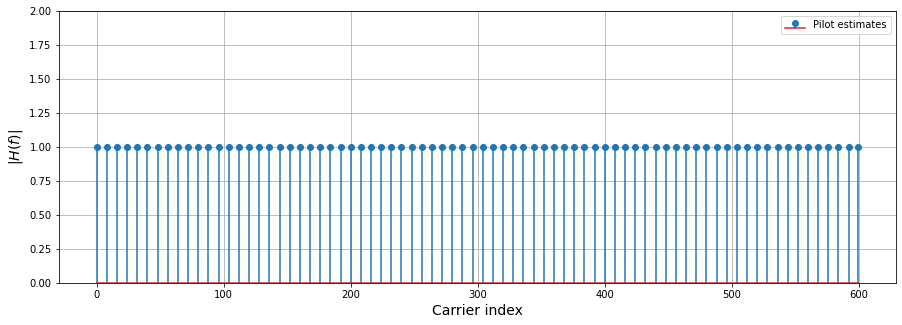

In [ ]:
import scipy
from scipy import interpolate
def estimate(signal):
    # extract pilots values
    pilots = signal[pilot_carriers]
    # divide by the transmitted pilot values
    pilot_est = pilots / pilot_value
    
    #Perform interpolation to achieve channel state for all subcariers
    # interpolation for amplitude
    est_abs = scipy.interpolate.interp1d(pilot_carriers, abs(pilot_est), kind='linear')(carriers)
    # interpolation for phase
    est_phase = scipy.interpolate.interp1d(pilot_carriers, np.angle(pilot_est), kind='linear')(carriers)
    # estimated signal
    estimation = est_abs * np.exp(1j*est_phase)
    
    plt.figure(figsize=(15,5))
    plt.stem(pilot_carriers, abs(pilot_est), label='Pilot estimates')
    plt.grid()
    plt.xlabel('Carrier index', fontsize = 14)
    plt.ylabel('$|H(f)|$', fontsize = 14)
    plt.legend(fontsize=10)
    plt.ylim(0,2)
    
    return estimation
H_est = estimate(OFDM_freq)

The estimated signal is flat because we have no channel influence

In [ ]:
#lets use estimation for equalization
def equalize(signal, H_est):
    # we use only first n_subd frequency samples
    return signal[:n_subc] / H_est
eq_H_est = equalize(OFDM_freq, H_est)

Lets put the sequences to the constellation:

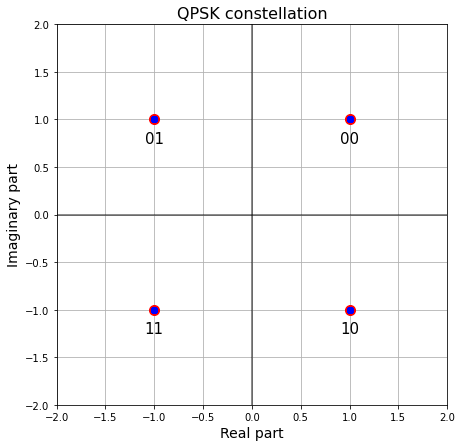

In [ ]:
def get_points(signal):
    return signal[data_carreiers]

QAM_est = get_points(eq_H_est)


plt.figure(figsize=(7,7))
for bit1 in [0,1]:
    for bit2 in [0,1]:
        bits = (bit1,bit2)
        value = mapping_table[bits]
        plt.plot(value.real, value.imag, 'o', color = 'red', markersize = 10 )
        plt.plot(QAM_est.real, QAM_est.imag, 'bo');
        plt.text(value.real, value.imag-0.25, ''.join(str(x) for x in bits), ha = 'center' ,fontsize= 15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('QPSK constellation', fontsize = 16)
plt.xlabel('Real part',fontsize =14)
plt.ylabel('Imaginary part', fontsize =14)
plt.vlines(0,-2,2,alpha = 0.6)
plt.hlines(0,-2,2, alpha =0.6)
plt.grid()


All blue points are in red ones, because we have no distortion from channel side. So we have an ideal case.

Now we want to demodulate our data:


In [ ]:
def Demapping(data):
    # constellation points
    constellation = np.array([x for x in demapping_table.keys()])
    # distances between const points and sequences
    dists = abs(data.reshape((-1,1)) - constellation.reshape((1,-1)))
    #for each data point find the nearest const point
    const_index = dists.argmin(axis=1)
    # decision value
    decision = constellation[const_index]
    # transform the constellation point into the bit groups
    return np.vstack([demapping_table[C] for C in decision]), decision

parallel_stream_est, decision = Demapping(QAM_est)

And reshape it to bitstream format:

In [ ]:
def to_bitstream(bits):
    return bits.reshape((-1,))
bits_est = to_bitstream(parallel_stream_est)

Function for BER calculation

In [ ]:
def BER(est_bits,true_bits):
    return np.sum(abs(true_bits-est_bits))/len(true_bits)

In [ ]:
BER(data,bits_est)

0.0

So we can see, that our system works correctly. Let us implement all these functions into one class for siplicity

In [ ]:
class OFDM_QPSK():
    def __init__(self, n_subc, c_prefix, n_pilots,N_DFT, pilot_value = -1-1j):
        
        self.n_subc = n_subc            # number of subcariers
        self.c_prefix  = c_prefix       # len of cyclic prefix
        self.n_pilots = n_pilots        # number of pilots
        self.PILOT_VALUE = pilot_value  # pilot symbol
        self.N_DFT = N_DFT              # size of DFT

        self.__init_subc()              # create subcariers
        self.__init_mapping()           # create mapping tables


    def __init_subc(self):
        '''
        initializes subcariers for pilots and data
        '''
        
        self.carriers = np.arange(self.n_subc)                                  # all subc                
        self.pilot_carriers = self.carriers[::self.n_subc//(self.n_pilots-1)]   # subc for pilots
        self.pilot_carriers = np.hstack([self.pilot_carriers,                   # last one is also pilot
                                         np.array([self.carriers[-1]])])
        self.data_carreiers = np.delete(self.carriers, self.pilot_carriers)     # data subc


    def __init_mapping(self):
        '''
        initializes mapping and demapping tables
        '''

        self.bits_per_symbol = 2                                                    
        # all amount of bits
        self.payloadBits_per_OFDM  = len(self.data_carreiers)*self.bits_per_symbol
        #create mapping table
        self.mapping_table = {
            (0,0) : 1+1j,
            (0,1) : -1+1j,
            (1,1) : -1-1j,
            (1,0) : 1-1j
        }
        # create demapping table
        self.demapping_table = {v : k for k, v in self.mapping_table.items()}

######################################################################################
#---------------------------- TRANSMITTER PART----------------------------------------

    def __generate_data(self):
        '''
        generates bitstream using binomial distribution
        '''
        return np.random.binomial(n=1, p=0.5, size=(self.payloadBits_per_OFDM,))
    

    def __serial_to_parallel(self, bits):
        '''
        Transforms bitstream to sequences of 2 bits
        '''
        return bits.reshape((len(self.data_carreiers), self.bits_per_symbol))


    def __modulate(self,bits):
        '''
        Applies QPSK modulation using mapping table
        '''
        return np.array([self.mapping_table[tuple(b)] for b in bits])


    def __data_allocate(self,data):
        '''
        Applies data allocation for data and pilot symbols
        '''
        symbol = np.zeros(self.n_subc, dtype=complex)
        symbol[self.pilot_carriers] = self.PILOT_VALUE
        symbol[self.data_carreiers] = data
        return symbol


    def __IFFT(self, data):
        '''
        Applies IFFT transform with @N_DFT size
        '''
        return np.fft.ifft(data, n =self.N_DFT)

    
    def __add_prefix(self,data):
        '''
        Add cyclic prefix to the begining of the signal
        '''
        cp = data[-self.c_prefix:]
        return np.hstack([cp,data])


    def generate_ofdm(self, get_bitstream = False):
        '''
        Creates random bitstream and crates OFDM signal
        returns:
        @ofdm_time_cp - ofdm signal in the time domain with prefix
        @bitstream - inital bitstream
        '''

        bitstream = self.__generate_data()
        parallel_bits = self.__serial_to_parallel(bitstream)
        modulated_bits =self.__modulate(parallel_bits)
        ofdm_data = self.__data_allocate(modulated_bits)

        ofdm_time = self.__IFFT(ofdm_data)
        ofdm_time_cp = self.__add_prefix(ofdm_time)

        if get_bitstream:
            return ofdm_time_cp, bitstream

        return ofdm_time_cp

######################################################################################
#---------------------------- RECEIVER PART------------------------------------------

    def __remove_prefix(self, signal):
        '''
        Removes cyclic prefix from ofdm signal
        '''
        return signal[self.c_prefix:]


    def __DFT(self,signal):
        '''
        Applies DFT transform to the signal
        '''
        return np.fft.fft(signal, n = self.N_DFT)


    def __equalize(self, signal, estimation):
        '''
        Equalization using estimated signal
        '''
        return signal[:self.n_subc]/estimation
    

    def __extract_data_subc(self,signal):
        '''
        data extraction from data subc
        '''
        return signal[self.data_carreiers]


    def __estimate(self,signal):
        '''
        Channel estimation using linear interpolation
        '''
        #pilot values
        pilots = signal[self.pilot_carriers]
        est_pilots = pilots/self.PILOT_VALUE

        #interpolate amplitude
        est_abs = scipy.interpolate.interp1d(self.pilot_carriers, abs(est_pilots), kind = 'linear')(self.carriers)
        #interpolate phase
        est_phase = scipy.interpolate.interp1d(self.pilot_carriers, np.angle(est_pilots),kind ='linear')(self.carriers)
        # estimated signal
        estimation = est_abs*np.exp(1j*est_phase)

        return estimation

    def __demapping(self,data):
        '''
        Applies demapping to the data using demapping_table
        '''
        #const points
        const = np.array([x for x in self.demapping_table.keys()])
        # calculate distances between const points and data points
        distance = abs(data.reshape((-1,1)) - const.reshape((1,-1)))
        # find nearest conts point
        nearest_idx = distance.argmin(axis = 1)
        # decision value
        decision = const[nearest_idx]

        return np.vstack([self.demapping_table[C] for C in decision]), decision

    def __parallel_to_bitstream(self,data):
        '''
        reshapes data to bitstream
        '''
        return data.reshape((-1,))
    
    def get_data(self, ofdm_signal_cp):
        '''
        From OFDM signal with prefix get initial bitstream 
        '''
        ofdm_signal = self.__remove_prefix(ofdm_signal_cp)
        ofdm_freq = self.__DFT(ofdm_signal)
        ch_est = self.__estimate(ofdm_freq)
        equalized = self.__equalize(ofdm_freq, ch_est)
        data_subc = self.__extract_data_subc(equalized)

        data, decision = self.__demapping(data_subc)
        bitstream = self.__parallel_to_bitstream(data)
        return bitstream


    def plot_subc(self,limit = True):
        '''
        Plots resource elemets for data and pilot subcariers  
        '''

        plt.figure(figsize = (25,1))
        plt.plot(self.data_carreiers, np.zeros_like(self.data_carreiers), 's',color = 'blue', label='data', alpha = 0.3, )
        plt.plot(self.pilot_carriers, np.zeros_like(self.pilot_carriers), 's',color = 'red', label='pilot')
        plt.xlabel('Carrier index', fontsize = 14)
        fr = plt.gca()
        fr.axes.yaxis.set_ticklabels([])
        plt.grid()
        plt.legend()
        if limit:
            plt.xlim(-1,150)
        plt.show()

    def plot_contellation(self):
        '''
        Plots QPSK constellation
        '''
        plt.figure(figsize=(7,7))
        for bit1 in [0,1]:
            for bit2 in [0,1]:
                bits = (bit1,bit2)
                value = self.mapping_table[bits]
                plt.plot(value.real, value.imag, 'o', color = 'red', markersize = 10 )
                plt.text(value.real, value.imag-0.25, ''.join(str(x) for x in bits), ha = 'center' ,fontsize= 15)
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.title('QPSK constellation', fontsize = 16)
        plt.xlabel('Real part',fontsize =14)
        plt.ylabel('Imaginary part', fontsize =14)
        plt.vlines(0,-2,2,alpha = 0.6)
        plt.hlines(0,-2,2, alpha =0.6)
        plt.grid()
        plt.show()

Finaly lets apply the channel with impulse responce and random noise 

In [ ]:
class Channel():
    def __init__(self, n_subc):
        #Channel impluse responce
        self.CIR = np.array([1, 0, 0.3+0.3j])
        self.n_subc = n_subc
        self.H = np.fft.fft(self.CIR,self.n_subc)

    def distort(self,signal, SNR):
        '''
        Simulate channel. Adds AWGN to signal according to @SNR value (dB)
        '''
        # signal after channel propagation
        signal = np.convolve(signal,self.CIR)
        # signal Power
        P_signal = np.mean(abs(signal**2))
        # noise variance
        sigma_noise = P_signal * 10**(-SNR/10)
        # generate noise
        noise = np.sqrt(sigma_noise/2) * (np.random.randn(*signal.shape)+1j*np.random.randn(*signal.shape))
        return signal+noise 

In [ ]:
import scipy 
from scipy import interpolate

Now we can test it. Let's choose high SNR value at first

In [ ]:
# Create transceiver and channel objects
transceiver = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
channel = Channel(n_subc =600)

In [ ]:
# generate OFDM signal
X, true_bits = transceiver.generate_ofdm(get_bitstream=True)
# simulate channel distortion
X = channel.distort(X, 0)
# transform signal to bits
x_est = generator.get_data(X)

In [ ]:
# Calcuate BER
BER(x_est, true_bits)

0.16220735785953178

Now lets test implemented class for different SNR values. Also for each value experiment will be repeated 500 times

In [ ]:
# Create objects
transceiver = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
channel = Channel(600)

#mean ber
ber_mean =[]
# variantion of ber
ber_std = []

# Snr range
for snr in np.linspace(-6,20,14):
    ber=[]
    # repetitions
    for repeat in range(500):
        # generate ofdm signal
        X,true_bits = transceiver.generate_ofdm(get_bitstream=True)
        # simulate channel
        X = channel.distort(X,snr)
        # recover the data
        x_est = transceiver.get_data(X)
        # calculate ber
        ber.append(BER(x_est, true_bits))
    ber_arr = np.array(ber)
    # find mean of repetitions
    ber_mean.append(np.mean(ber_arr))
    # find variation of repetitions
    ber_std.append(np.std(ber_arr))


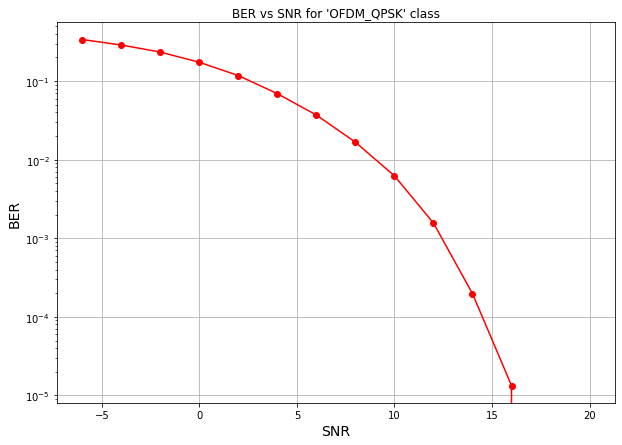

In [ ]:
plt.figure(figsize=(10,7))
plt.title("BER vs SNR for 'OFDM_QPSK' class")
plt.xlabel("SNR", fontsize = 14)
plt.ylabel("BER", fontsize = 14)
#plt.errorbar(x= np.linspace(-6,20,14),y =ber_mean, yerr= ber_std, uplims=True, alpha = 0.6)
plt.plot(np.linspace(-6,20,14),ber_mean,'o-', alpha =1.0,  color = 'red')
plt.yscale('log')
plt.grid()

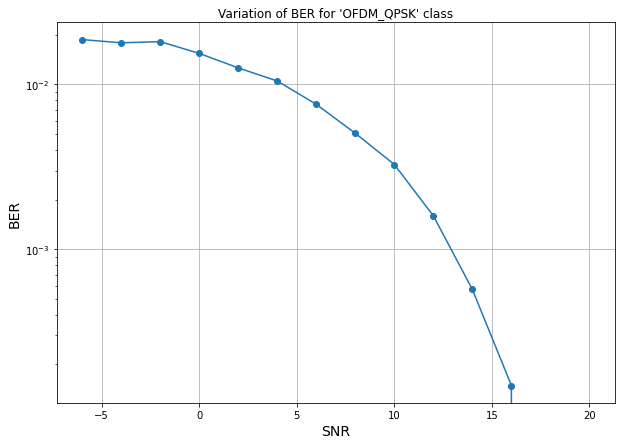

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Variation of BER for 'OFDM_QPSK' class")
plt.xlabel("SNR", fontsize = 14)
plt.ylabel("BER", fontsize = 14)
plt.plot(np.linspace(-6,20,14),ber_std,'o-')
plt.yscale('log')
plt.grid()

Now lets add IQ distortion

In [ ]:
generator = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
channel = Channel(600)

ber_IQ_mean =[]
ber_IQ_std = []

ber_IQ_mean_ =[]

for snr in np.linspace(-6,20,14):
    ber=[]
    ber_=[]
    for repeat in range(500):
        X,true_bits = generator.generate_ofdm(get_bitstream=True)
        X = channel.distort(X,snr)
        
        h = np.random.normal(0.2,0.1,1) + 1j*np.random.normal(0.2,0.1,1)
        X = IQ_distort(X,h)

        x_est = generator.get_data(X)
        ber_.append(BER(x_est, true_bits))

        h_est = h_estimate(X)
        X = x_estimate(X, h_est) 

        x_est = generator.get_data(X)

        ber.append(BER(x_est, true_bits))
    ber_arr = np.array(ber)
    ber_IQ_mean.append(np.mean(ber_arr))
    ber_IQ_std.append(np.std(ber_arr))
    ber_IQ_mean_.append(np.mean(np.array(ber_)))


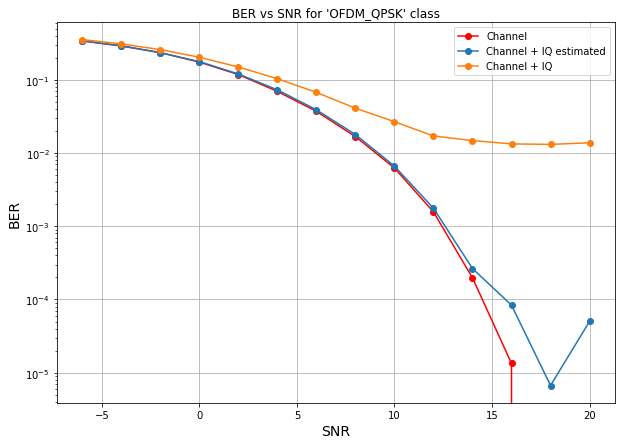

In [ ]:
plt.figure(figsize=(10,7))
plt.title("BER vs SNR for 'OFDM_QPSK' class")
plt.xlabel("SNR", fontsize = 14)
plt.ylabel("BER", fontsize = 14)
#plt.errorbar(x= np.linspace(-6,20,14),y =ber_mean, yerr= ber_std, uplims=True, alpha = 0.6)
plt.plot(np.linspace(-6,20,14),ber_mean,'o-', alpha =1.0,  color = 'red', label = 'Channel')
plt.plot(np.linspace(-6,20,14),ber_IQ_mean,'o-',label ='Channel + IQ estimated')
plt.plot(np.linspace(-6,20,14),ber_IQ_mean_,'o-',label ='Channel + IQ')
plt.yscale('log')
plt.legend()
plt.grid()

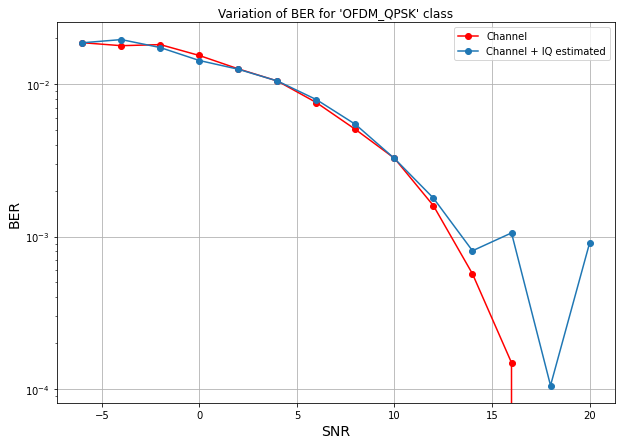

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Variation of BER for 'OFDM_QPSK' class")
plt.xlabel("SNR", fontsize = 14)
plt.ylabel("BER", fontsize = 14)
plt.plot(np.linspace(-6,20,14),ber_std,'o-', label = 'Channel',color = 'red')
plt.plot(np.linspace(-6,20,14),ber_IQ_std,'o-',label ='Channel + IQ estimated')
#plt.plot(np.linspace(-6,20,14),bet_IQ_std_,'o-',label ='Channel + IQ')

plt.yscale('log')
plt.legend()
plt.grid()

We can see that our method perform good results. However the result depend on h_mean. For example, lets choose another value:

In [ ]:
generator = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
channel = Channel(600)

ber_IQ_mean =[]
ber_IQ_std = []

ber_IQ_mean_ =[]

for snr in np.linspace(-6,20,14):
    ber=[]
    ber_=[]
    for repeat in range(500):
        X,true_bits = generator.generate_ofdm(get_bitstream=True)
        X = channel.distort(X,snr)
        
        h = np.random.normal(0.5,0.1,1) + 1j*np.random.normal(0.5,0.1,1)
        X = IQ_distort(X,h)

        x_est = generator.get_data(X)
        ber_.append(BER(x_est, true_bits))

        h_est = h_estimate(X)
        X = x_estimate(X, h_est) 

        x_est = generator.get_data(X)

        ber.append(BER(x_est, true_bits))
    ber_arr = np.array(ber)
    ber_IQ_mean.append(np.mean(ber_arr))
    ber_IQ_std.append(np.std(ber_arr))
    ber_IQ_mean_.append(np.mean(np.array(ber_)))


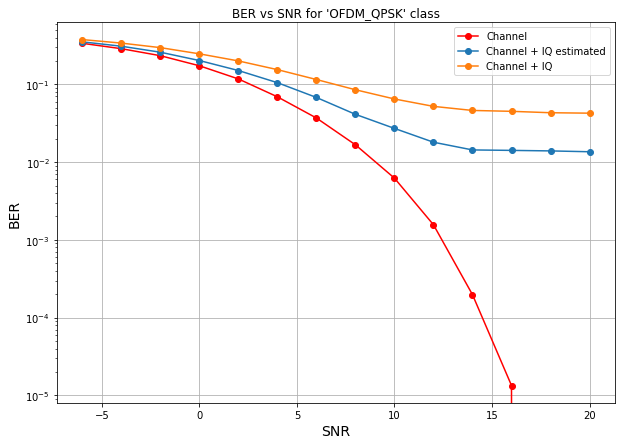

In [ ]:
plt.figure(figsize=(10,7))
plt.title("BER vs SNR for 'OFDM_QPSK' class")
plt.xlabel("SNR", fontsize = 14)
plt.ylabel("BER", fontsize = 14)
#plt.errorbar(x= np.linspace(-6,20,14),y =ber_mean, yerr= ber_std, uplims=True, alpha = 0.6)
plt.plot(np.linspace(-6,20,14),ber_mean,'o-', alpha =1.0,  color = 'red', label = 'Channel')
plt.plot(np.linspace(-6,20,14),ber_IQ_mean,'o-',label ='Channel + IQ estimated')
plt.plot(np.linspace(-6,20,14),ber_IQ_mean_,'o-',label ='Channel + IQ')
plt.yscale('log')
plt.legend()
plt.grid()

We can see, that the result become much worse. 

Lets experiment with differenet h_mean values.

In [ ]:
def repeat(snr_range, h_var):
    generator = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
    channel = Channel(600)

    snr  = snr_range
    ber=[]

    for repeat in range(300):
        X,true_bits = generator.generate_ofdm(get_bitstream=True)
        X = channel.distort(X,snr)
        
        h = np.random.normal(h_var,0.1,1) + 1j*np.random.normal(h_var,0.1,1)
        X = IQ_distort(X,h)

        h_est = h_estimate(X)
        X = x_estimate(X, h_est) 

        x_est = generator.get_data(X)

        ber.append(BER(x_est, true_bits))

    ber_arr = np.array(ber)
    
    return np.mean(ber_arr) , np.std(ber_arr)

In [ ]:
h_sigma = np.linspace(-2,2,50)
SNR_range = np.linspace(-6,20,14)

xx, yy = np.meshgrid(h_sigma,SNR_range)

zz = np.empty_like(xx)
zz_std = np.empty_like(xx)

for i,h in enumerate(h_sigma):
    for j,snr in enumerate(SNR_range):
        zz[j,i], zz_std[j,i] = repeat(snr,h)

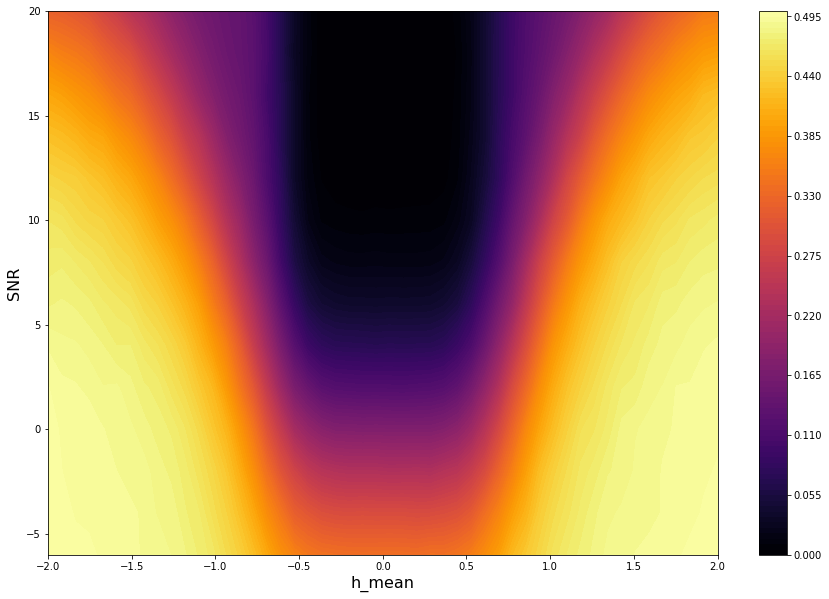

In [ ]:
plt.figure(figsize = (15,10))
plt.contourf(xx,yy,zz, levels= 100, cmap ='inferno' )
plt.xlabel("h_mean", fontsize = 16)
plt.ylabel("SNR", fontsize = 16)
plt.colorbar();
# Color represents - BER

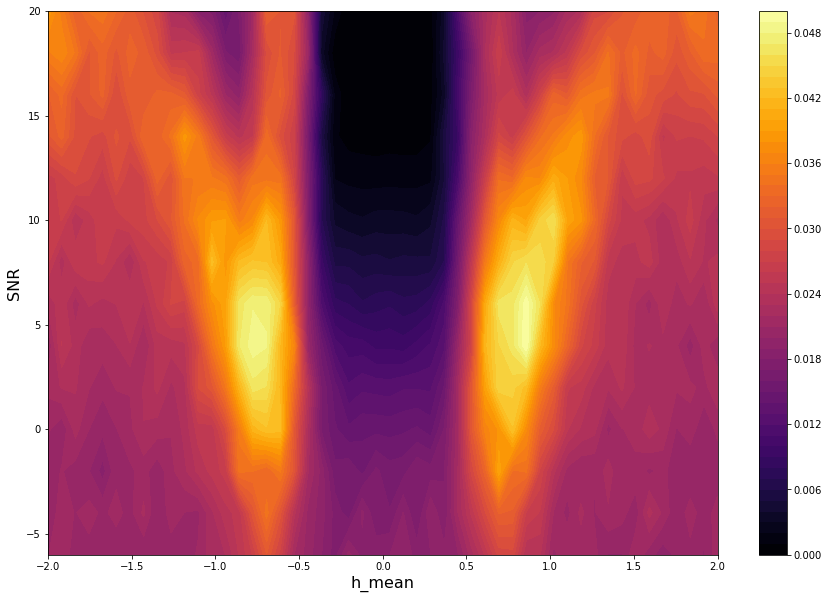

In [ ]:
plt.figure(figsize = (15,10))
plt.contourf(xx,yy,zz_std, levels= 50, cmap ='inferno')
plt.xlabel("h_mean", fontsize = 16)
plt.ylabel("SNR", fontsize = 16)
plt.colorbar()
# Color represents - BER

Text(0.5, 0, 'BER')

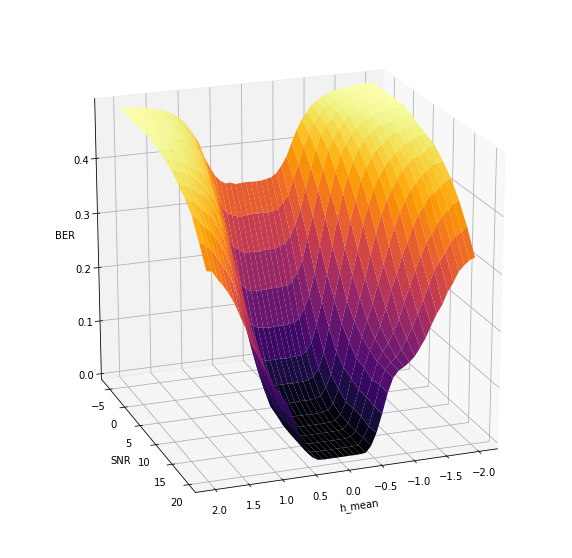

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(10,10) )
ax = fig.add_subplot(111, projection='3d',)
ax.view_init(20,70)
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap=plt.cm.inferno, linewidth=0, antialiased=True)


ax.set_xlabel('h_mean')
ax.set_ylabel('SNR')
ax.set_zlabel('BER')

Text(0.5, 0, 'BER')

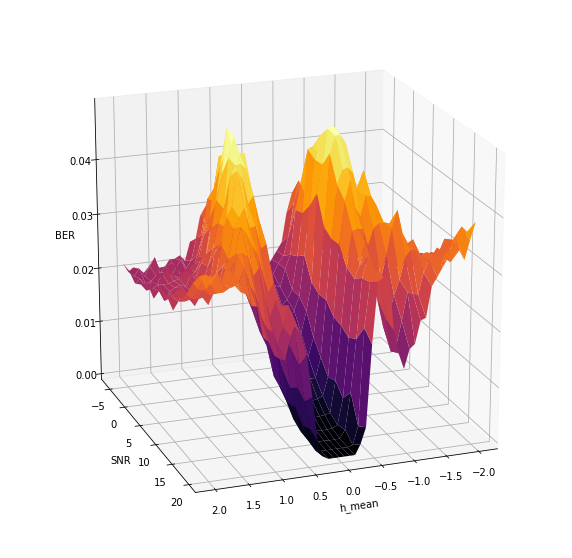

In [ ]:

fig = plt.figure(figsize =(10,10) )
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20,70)
surf = ax.plot_surface(xx, yy, zz_std, rstride=1, cstride=1, cmap=plt.cm.inferno, linewidth=0, antialiased=True)

ax.set_xlabel('h_mean')
ax.set_ylabel('SNR')
ax.set_zlabel('BER')

According to these plots we can say that h_mean value significatly changes the result. It's better to have its absolute value as low as possible. Moreover it's unexpected but for specific values (2 peaks on the last plot) of h_mean and SNR we have the most unstable results. And h_mean is not equal to 1 for these strange peaks. It's between 0.5 and 1. And SNR is equal to 5 there.

# **Subtask 5**

Let's plot signal spectrums

In [ ]:
generator = OFDM_QPSK(n_subc=600, c_prefix=128, n_pilots=300, N_DFT=1024)
channel = Channel(600)

snr  = 10
X,true_bits = generator.generate_ofdm(get_bitstream=True)

X1 = X#plt.magnitude_spectrum(X)
X = channel.distort(X,snr)
X2 = X#plt.magnitude_spectrum(X)

h = np.random.normal(0.2,0.1,1) + 1j*np.random.normal(0.2,0.1,1)
X = IQ_distort(X,h)
X3 = X#plt.magnitude_spectrum(X)

h_est = h_estimate(X)
X = x_estimate(X, h_est) 
X4 =X #plt.magnitude_spectrum(X)
x_est = generator.get_data(X)


#ber_arr = np.array(ber)
    


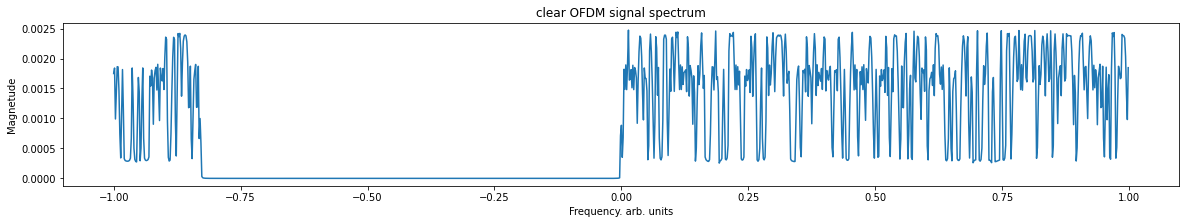

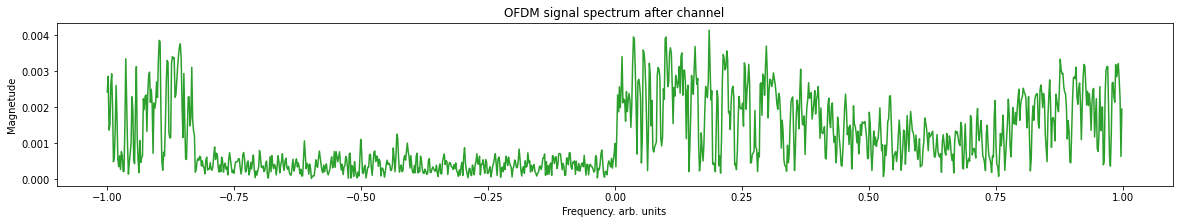

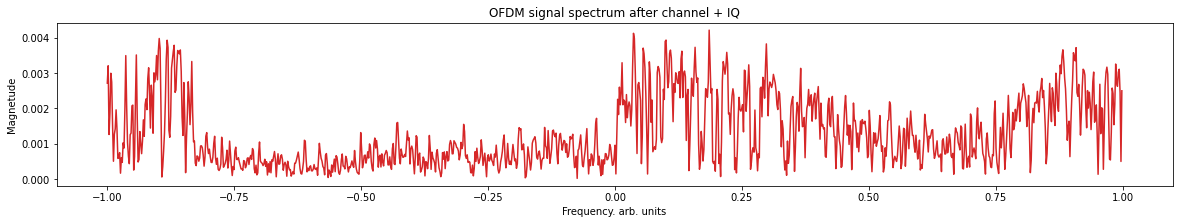

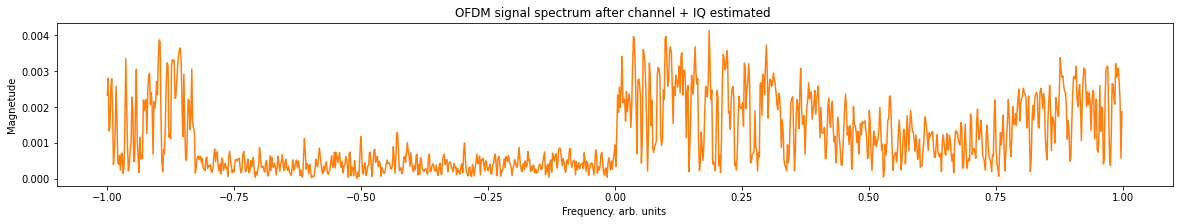

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(X1[1], X1[0],color = 'tab:blue')
plt.title('clear OFDM signal spectrum')
plt.xlabel('Frequency. arb. units')
plt.ylabel('Magnetude')
plt.show()

plt.figure(figsize=(20,3))
plt.plot(X2[1], X2[0], color = 'tab:green')
plt.title('OFDM signal spectrum after channel')
plt.xlabel('Frequency. arb. units')
plt.ylabel('Magnetude')
plt.show()

plt.figure(figsize=(20,3))
plt.plot(X3[1], X3[0],color = 'tab:red')
plt.title('OFDM signal spectrum after channel + IQ')
plt.xlabel('Frequency. arb. units')
plt.ylabel('Magnetude')
plt.show()

plt.figure(figsize=(20,3))
plt.plot(X4[1], X4[0],color = 'tab:orange')
plt.title('OFDM signal spectrum after channel + IQ estimated ')
plt.xlabel('Frequency. arb. units')
plt.ylabel('Magnetude')
plt.show()